In [10]:
# Calculate MTF

"""
Script to calculate the Modulation transfer function of a edge target.

Kickstarted from from https://gist.github.com/stefanv/2051954 and additional
info from http://www.normankoren.com/Tutorials/MTF.html which tells us that
"MTF can be defined as the magnitude of the Fourier transform of the point or
line spread function. And some wikipedia lookup.
"""
%matplotlib inline
import numpy
import scipy
import scipy.ndimage
import skimage.measure
import matplotlib.pylab as plt
import imageio

In [2]:
def MTF(edgespreadfunction):
    '''
    Compute the modulation transfer function (MTF).

    The MTF is defined as the FFT of the line spread function.
    The line spread function is defined as the derivative of the edge spread
    function. The edge spread function are the values along an edge, ideally a
    knife-edge test target. See an explanation here: http://is.gd/uSC5Ve
    '''
    linespreadfunction = numpy.diff(edgespreadfunction)
#     linespreadfunction = numpy.append(linespreadfunction, numpy.zeros(100))
    mtf = numpy.fft.fft(linespreadfunction)
    print(len(mtf))
    return numpy.abs(mtf[:len(mtf)//2])

Text(0.5, 1.0, 'Filtered edge with profile location')

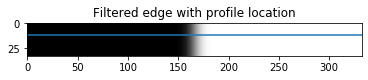

In [3]:
# Generate edge for N points
N = 333
y = 12
dirac = numpy.zeros([N//10,N])
dirac += 0.25
dirac[:,N//2:] = 0.9
dirac1 = scipy.ndimage.gaussian_filter1d(dirac, 1)
dirac3 = scipy.ndimage.gaussian_filter1d(dirac, 3)
dirac7 = scipy.ndimage.gaussian_filter1d(dirac, 7)
plt.imshow(dirac7, cmap='gray')
plt.axhline(y)
plt.title('Filtered edge with profile location')

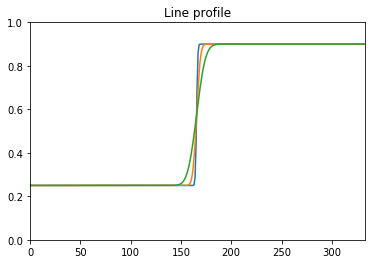

In [5]:
# Get line profile
start = [y,0]
stop = [y,N-1]
profile1 = skimage.measure.profile_line(dirac1, start, stop, linewidth=10, mode='constant')
profile3 = skimage.measure.profile_line(dirac3, start, stop, linewidth=10, mode='constant')
profile7 = skimage.measure.profile_line(dirac7, start, stop, linewidth=10, mode='constant')
plt.plot(profile1)
plt.plot(profile3)
plt.plot(profile7)
plt.ylim([0,1])
plt.xlim([0,N])
plt.title('Line profile')
plt.show()


332
332
332


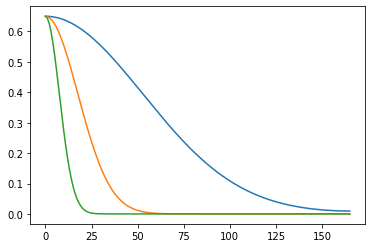

In [6]:
plt.plot(MTF(profile1))
plt.plot(MTF(profile3))
plt.plot(MTF(profile7))
plt.show()

In [12]:
# Load image
Image = imageio.imread('/home/habi/1272/David/MachineComparison/ChorioallantoicMembrane1272/proj/ChorioallantoicMembrane1272~0000000000.tif', flatten=True)
plt.imshow(Image, cmap='gray')

FileNotFoundError: No such file: '/home/habi/1272/David/MachineComparison/ChorioallantoicMembrane1272/proj/ChorioallantoicMembrane1272~0000000000.tif'

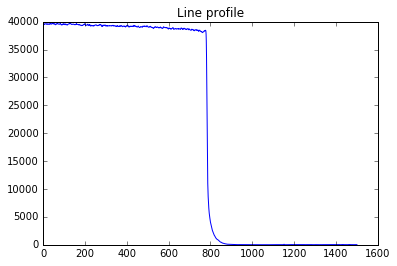

In [7]:
# Get line profile
start = [500,500]
stop = [2000,500]
lineprofile = skimage.measure.profile_line(Image, start, stop, linewidth=55)
plt.plot(lineprofile)
plt.title('Line profile')
plt.show()


1500


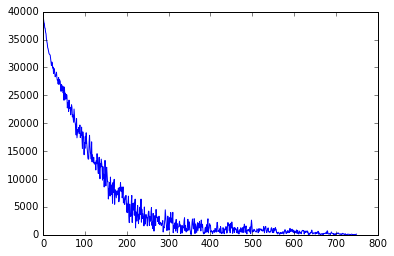

In [8]:
plt.plot(MTF(lineprofile))

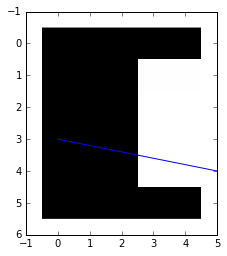

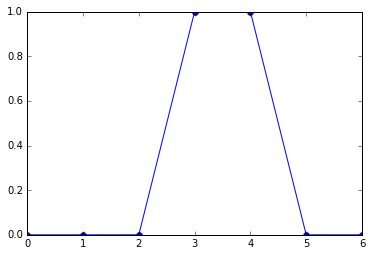

In [9]:
from skimage import measure
start = [3,0]
stop = [4,5]
x = numpy.array([[0, 0, 0, 1, 1, ]])
img = numpy.vstack([numpy.zeros_like(x), x, x, x, x, numpy.zeros_like(x)])
profile = skimage.measure.profile_line(img, start, stop)
plt.imshow(img, cmap='gray', interpolation='none')
plt.plot([start[1], stop[1]], [start[0], stop[0]])
plt.figure()
plt.plot(profile, marker='o')

6


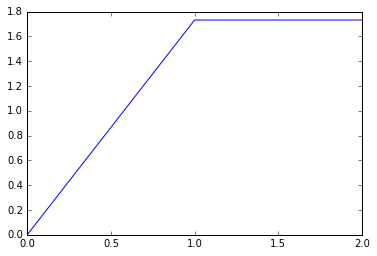

In [10]:
plt.plot(MTF(profile))